In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [2]:
# Secret number to guess
secret_number = "101001"
secret_number_length = len(secret_number)

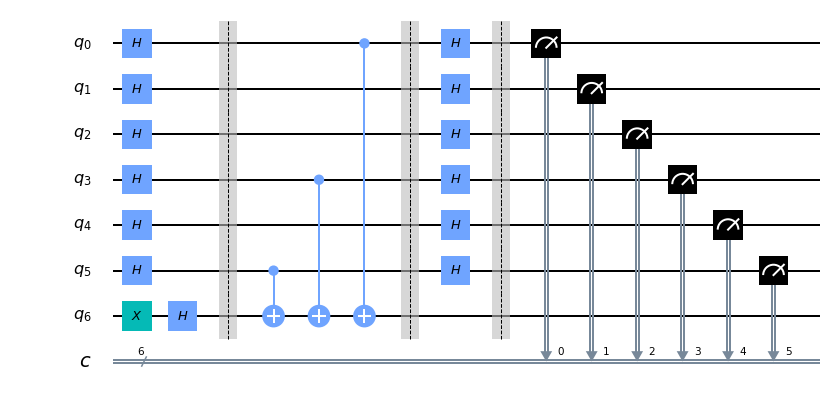

In [3]:
# Create the circuit with the the number of qbits equal to the length of the secret number plus an extra qbit
circuit = QuantumCircuit(secret_number_length+1, secret_number_length)

# Apply hadamard to the first qbits from the secret number
circuit.h(range(secret_number_length))

# For the last extra qbit we add an X gate before the hadamard
circuit.x(secret_number_length)
circuit.h(secret_number_length)

circuit.barrier()

# Set the secret number in the circuit
for i, b in enumerate(secret_number):
    # For each digit n equal to 1 we add a controled x with the n qbit as control and the extra qbit as target
    if b == '1':
        circuit.cx(secret_number_length-1-i, secret_number_length)
        
circuit.barrier()

# Apply again the hadamard to the first qbits from the secret number
circuit.h(range(secret_number_length))

circuit.barrier()

# Measure the first qbits of the secret number
circuit.measure(range(secret_number_length), range(secret_number_length))

circuit.draw(output="mpl")

In [4]:
# Execute the circuit
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
# Show the number of the result. Must match the secret number
print(counts)

{'101001': 1}
